# Ising Model

## Objectives

- Simulate magnetic phase transitions in a 2D lattice using the Metropolis-Hastings algorithm.
- Analyze the relationship between temperature and magnetization to observe the transition from ferromagnetism to paramagnetism.
- Calculate thermodynamic variables including Total Energy, Magnetization, and Specific Heat.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize the lattice
def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

# Compute the energy (E)
def compute_energy(lattice, J=-1.0, H=0.0):
    L = lattice.shape[0]
    energy = 0
    
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = (
                lattice[(i+1) % L, j] +  # Down
                lattice[(i-1) % L, j] +  # Up
                lattice[i, (j+1) % L] +  # Right
                lattice[i, (j-1) % L]    # Left
            )
            
            energy += -J * S * neighbors  # Exchange interaction
    
    energy /= 2  # To compensate for double counting
    energy += -H * np.sum(lattice)  # External field contribution
    
    return energy

# Compute magnetization per spin (<m>)
def compute_magnetization(lattice):
    return np.abs(np.sum(lattice)) / lattice.size

# Monte Carlo step using Metropolis algorithm
def monte_carlo_step(lattice, beta, J=-1.0, H=0.0):
    L = lattice.shape[0]
    
    for _ in range(L**2):  # Sweep over all spins
        i, j = np.random.randint(0, L, size=2)
        S = lattice[i, j]
        
        neighbors = (
            lattice[(i+1) % L, j] +  # Down
            lattice[(i-1) % L, j] +  # Up
            lattice[i, (j+1) % L] +  # Right
            lattice[i, (j-1) % L]    # Left
        )

        dE = 2 * J * S * neighbors + 2 * H * S
        
        if dE < 0 or np.random.rand() < np.exp(-beta * dE):
            lattice[i, j] *= -1  # Flip spin

# Simulate the Ising model
def simulate_ising(L, T, J=-1.0, H=0.0, equilibration_steps=100, mc_steps=1000):
    beta = 1.0 / T
    lattice = initialize_lattice(L)
    
    # Equilibration
    for _ in range(equilibration_steps):
        monte_carlo_step(lattice, beta, J, H)
    
    energies = []
    magnetizations = []
    
    for _ in range(mc_steps):
        monte_carlo_step(lattice, beta, J, H)
        energies.append(compute_energy(lattice, J, H))
        magnetizations.append(compute_magnetization(lattice))
    
    E_avg = np.mean(energies)
    E2_avg = np.mean(np.array(energies) ** 2)
    M_avg = np.mean(magnetizations)
    
    Cv = (E2_avg - E_avg**2) / (L * L * T**2)  # Specific heat

    return Cv, M_avg, lattice  # Return the final lattice


# Ferromagnetic material

In [11]:
np.random.seed(261)

# Set parameters
L = 20  # Lattice size
J = 1.0 # Exchange interaction
H = 0.0 # external magnetic field
equilibration_steps = 500
mc_steps = 1000
T_values = np.linspace(1.5, 3.5, 20)  # Temperature range
Cv_values = []
M_values = []

for T in T_values:
    Cv, M, lattice_sample = simulate_ising(L, T, J, H, equilibration_steps, mc_steps)
    Cv_values.append(Cv)
    M_values.append(M)

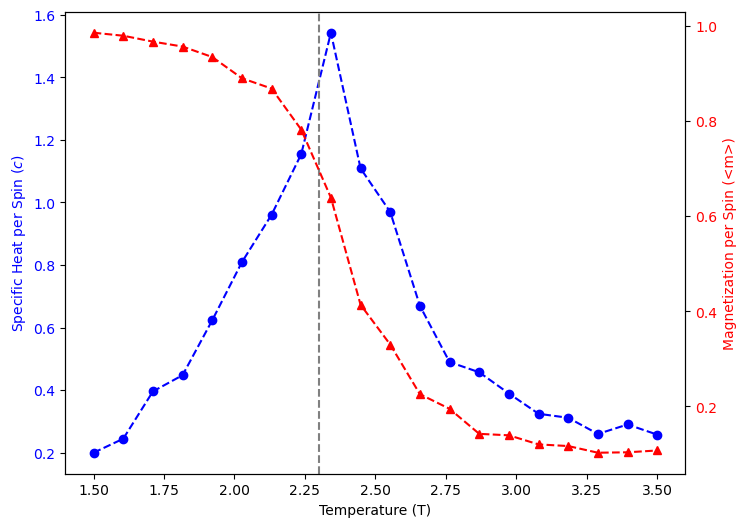

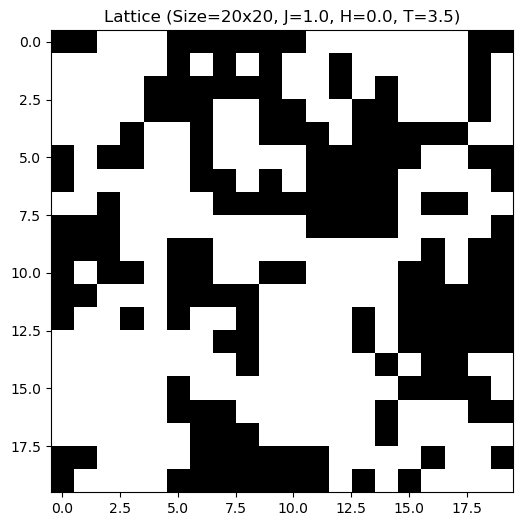

In [12]:
# Create a figure with a primary y-axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Specific Heat (Cv) on primary y-axis
ax1.plot(T_values, Cv_values, 'bo--', label='Specific Heat per Spin')
ax1.axvline(2.3, ls="--", color="gray") # Theoretical critical temperature for small lattices
ax1.set_xlabel('Temperature (T)')
ax1.set_ylabel('Specific Heat per Spin ($c$)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(T_values, M_values, 'r^--', label='Magnetization per Spin')
ax2.set_ylabel('Magnetization per Spin (<m>)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Visualize the last lattice configuration
plt.figure(figsize=(6, 6))
plt.imshow(lattice_sample, cmap='gray', interpolation='nearest')
plt.title(f'Lattice (Size={L}x{L}, J={J}, H={H}, T={T_values[-1]})')
plt.show()


# Antiferromagnetic material

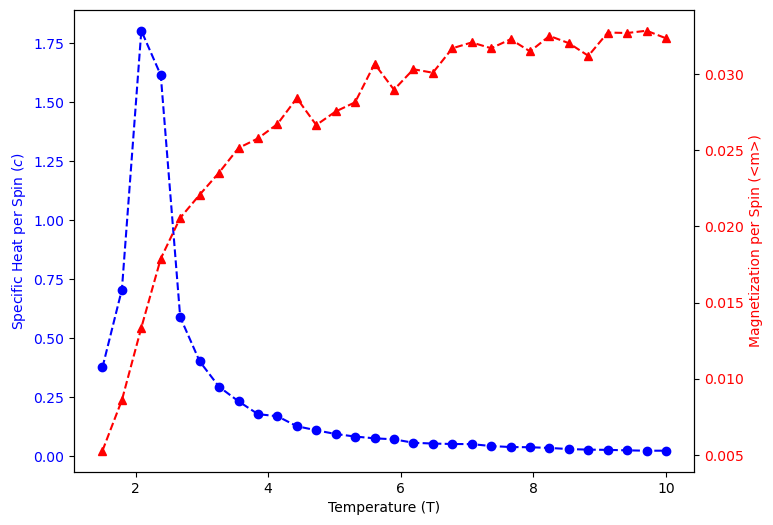

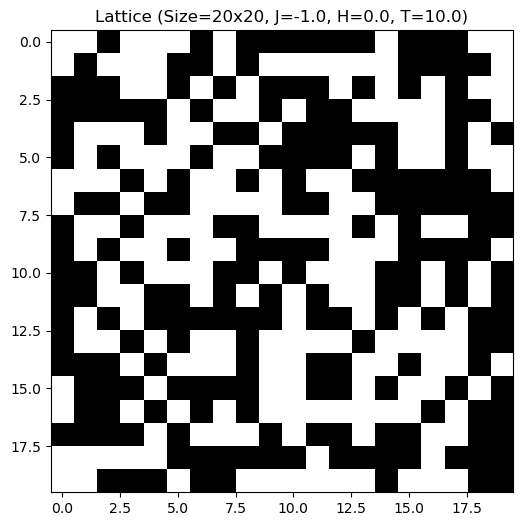

In [19]:
np.random.seed(2256)

# Set parameters
L = 20  # Lattice size
J = -1.0 # Interaction
H = 0.0 # external magnetic field
equilibration_steps = 100
mc_steps = 1000
T_values = np.linspace(1.5, 10, 30)  # Temperature range
Cv_values = []
M_values = []

for T in T_values:
    Cv, M, lattice_sample = simulate_ising(L, T, J, H, equilibration_steps, mc_steps)
    Cv_values.append(Cv)
    M_values.append(M)
    
# Create a figure with a primary y-axis
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot Specific Heat (Cv) on primary y-axis
ax1.plot(T_values, Cv_values, 'bo--', label='Specific Heat per Spin')
ax1.set_xlabel('Temperature (T)')
ax1.set_ylabel('Specific Heat per Spin ($c$)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(T_values, M_values, 'r^--', label='Magnetization per Spin')
ax2.set_ylabel('Magnetization per Spin (<m>)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Visualize the sample lattice configuration
plt.figure(figsize=(6, 6))
plt.imshow(lattice_sample, cmap='gray', interpolation='nearest')
plt.title(f'Lattice (Size={L}x{L}, J={J}, H={H}, T={T_values[-1]})')
plt.show()
